In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 17104 images belonging to 10 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/valid',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 4585 images belonging to 10 classes.


In [ ]:
#First Moddel
from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn = tf.keras.models.Sequential()

#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(BatchNormalization())

# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())

#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(Dropout(0.25))

# cnn.add(BatchNormalization())

# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())

# Flattening
cnn.add(tf.keras.layers.Flatten())
# cnn.add(BatchNormalization())

#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn.add(BatchNormalization())

#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn.summary()
# Fit
temp = cnn.fit(x = train_generator, validation_data=test_generator,epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=cnn.evaluate(train_generator)
scores2=cnn.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

144/144 [==============================] - 16s 114ms/step - loss: 0.0794 - accuracy: 0.8938
Training Loss is :0.01931273192167282
Validation Loss is :0.07938103377819061
Validation Accuracy is :89.37841057777405 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

144/144 [==============================] - 16s 109ms/step


In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.08      0.08      0.08       425
                        Tomato___Early_blight       0.10      0.11      0.10       480
                         Tomato___Late_blight       0.11      0.10      0.10       463
                           Tomato___Leaf_Mold       0.10      0.07      0.08       470
                  Tomato___Septoria_leaf_spot       0.11      0.15      0.13       436
Tomato___Spider_mites Two-spotted_spider_mite       0.09      0.08      0.08       435
                         Tomato___Target_Spot       0.08      0.09      0.09       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.10      0.10      0.10       490
                 Tomato___Tomato_mosaic_virus       0.11      0.11      0.11       448
                             Tomato___healthy       0.10      0.12      0.11       481

                                     accu

<AxesSubplot:>

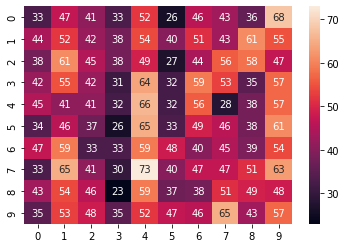

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# Testing the model
import keras.utils as image
test = image.load_img("/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)

1/1 [==============================] - 0s 149ms/step


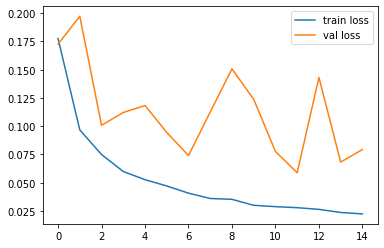

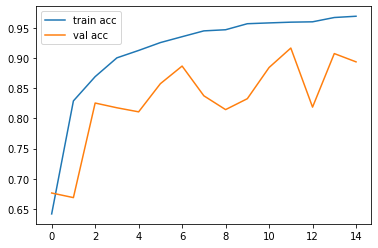

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Inception-V3

Detection of Tomato Leaf Disease by Transfer learning Inception-V3

In [ ]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

Data Augmentation

Increasing the data by horizontal flip, shear range and rotation range to get the image classification better accuracy. Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,rotation_range=.2,shear_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

About Dataset

The dataset consists of training data, and validation data.
The training data consists of 17104 images with 10 classes and 4585 test images with 10.
The classes are Tomato___Bacterial_spot, Tomato___Early_blight, Tomato___healthy, Tomato___Late_blight, Tomato___Leaf_Mold, Tomato___Septoria_leaf_spot, Tomato___Spider_mites Two-spotted_spider_mite, Tomato___Target_Spot, Tomato___Tomato_mosaic_virus, Tomato___Tomato_Yellow_Leaf_Curl_Virus.

In [ ]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train",
                                               target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True)
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/valid",
                                          target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True)

Found 17104 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


InceptionV3

Inception v3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge. Just as ImageNet can be thought of as a database of classified visual objects, Inception helps classification of objects in the world of computer vision.

In [ ]:
inception=InceptionV3(input_shape=[224,224,3],weights="imagenet",include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


We will not train the layers because the layers of InceptionV3 layers are already trained with imagenet dataset.

In [ ]:
for layer in inception.layers:
  layer.trainable=False

In [ ]:
folder=glob("/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train*")

Adding a flatten layer along with a Dense layer whose neuron will be equal to the number of classes with and activation funtion softmax

Then we will concat the model and name inception_model

In [ ]:
x=Flatten()(inception.output)
predict_inception=Dense(units=len(folder),activation="softmax")(x)
inception_model=Model(inputs=inception.input,outputs=predict_inception)

We have taken the optimizer Adam and the loss will be categorical crossentropy and our aim will be to find the accuracy

In [ ]:
inception_model.compile(optimizer="adam",
                        loss="categorical_crossentropy",metrics=["accuracy"])

Final Architecture

In [ ]:
inception_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_2[0][0]']               
 alization)                     )                                                             

VGG16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.

In [ ]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,shear_range=.2,rotation_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train",
                                               target_size=(224,224),class_mode="categorical",batch_size=50,shuffle=True)
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/valid",
                                          target_size=(224,224),batch_size=50,class_mode="categorical",shuffle=True)

Found 17104 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
vgg16=VGG16(include_top=False,weights="imagenet",input_shape=[224,224,3])

58889256/58889256 [==============================] - 2s 0us/step


We will not train the layers because the layers of VGG16 layers are already trained with imagenet dataset.

In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
folder=glob("/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/*")
folder

['/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/d

Adding a flatten layer along with a Dense layer whose neuron will be equal to the number of classes with and activation funtion softmax

Then we will concat the model and name vgg16_model

In [ ]:
x=Flatten()(vgg16.output)
pred_vgg16=Dense(units=len(folder),activation="softmax")(x)
vgg16_model=Model(inputs=vgg16.input,outputs=pred_vgg16)

We have taken the optimizer Adam and the loss will be categorical crossentropy and our aim will be to find the accuracy

In [ ]:
vgg16_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

Final Architecture


In [ ]:
vgg16_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
transfer_vgg16=vgg16_model.fit_generator(training_set,validation_data=test_set,epochs=10,
                                         validation_steps=len(test_set),steps_per_epoch=len(training_set))

<ipython-input-44-f986299ce614>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  transfer_vgg16=vgg16_model.fit_generator(training_set,validation_data=test_set,epochs=10,


Epoch 1/10
343/343 [==============================] - 304s 871ms/step - loss: 0.6837 - accuracy: 0.7756 - val_loss: 0.5464 - val_accuracy: 0.8009
Epoch 2/10
343/343 [==============================] - 300s 873ms/step - loss: 0.2983 - accuracy: 0.9021 - val_loss: 0.3599 - val_accuracy: 0.8809
Epoch 3/10
343/343 [==============================] - 300s 874ms/step - loss: 0.2109 - accuracy: 0.9275 - val_loss: 0.3761 - val_accuracy: 0.8748
Epoch 4/10
343/343 [==============================] - 305s 889ms/step - loss: 0.1714 - accuracy: 0.9433 - val_loss: 0.3094 - val_accuracy: 0.8962
Epoch 5/10
343/343 [==============================] - 300s 876ms/step - loss: 0.1334 - accuracy: 0.9556 - val_loss: 0.3168 - val_accuracy: 0.8986
Epoch 6/10
343/343 [==============================] - 327s 953ms/step - loss: 0.1068 - accuracy: 0.9654 - val_loss: 0.2925 - val_accuracy: 0.9091
Epoch 7/10
343/343 [==============================] - 302s 880ms/step - loss: 0.0851 - accuracy: 0.9723 - val_loss: 0.2719 -

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=vgg16_model.evaluate(training_set)
scores2=vgg16_model.evaluate(test_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

92/92 [==============================] - 23s 249ms/step - loss: 0.2617 - accuracy: 0.9200
Training Loss is :0.05901450291275978
Training Accuracy is :98.19340705871582 %
Validation Loss is :0.26170411705970764
Validation Accuracy is :91.9956386089325 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = vgg16_model.predict(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys()) 

92/92 [==============================] - 22s 243ms/step


In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.11      0.10      0.10       425
                        Tomato___Early_blight       0.09      0.10      0.10       480
                         Tomato___Late_blight       0.10      0.10      0.10       463
                           Tomato___Leaf_Mold       0.10      0.10      0.10       470
                  Tomato___Septoria_leaf_spot       0.08      0.07      0.08       436
Tomato___Spider_mites Two-spotted_spider_mite       0.10      0.12      0.11       435
                         Tomato___Target_Spot       0.10      0.09      0.09       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.11      0.11      0.11       490
                 Tomato___Tomato_mosaic_virus       0.09      0.09      0.09       448
                             Tomato___healthy       0.11      0.12      0.12       481

                                     accu

<AxesSubplot:>

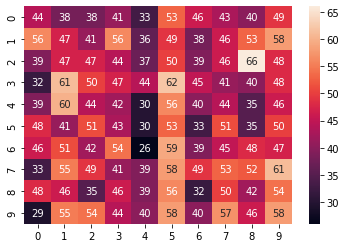

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

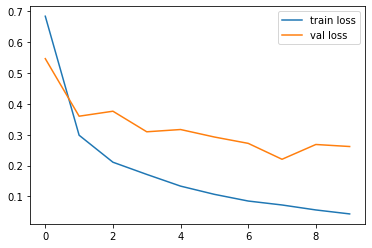

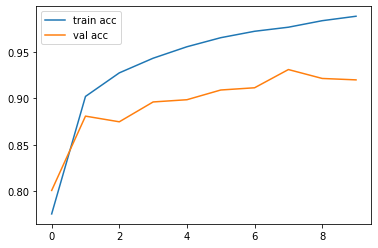

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='train acc')
plt.plot(transfer_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Prediction

In [ ]:
y_pred_vgg16=vgg16_model.predict(test_set)

92/92 [==============================] - 21s 229ms/step


The predicted output is a probability due to the activation funtion Softmax, it returns probability of the classes We will now change the probability to discrete values

In [ ]:
import numpy as np
y_pred_vgg16=np.argmax(y_pred_vgg16,axis=1)

Saving the model

In [ ]:
vgg16_model.save("Tomato_vgg16.h5")
from tensorflow.keras.models import load_model
modelvgg16=load_model("Tomato_vgg16.h5")

Testing the Model with validation dataset

Saving 0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG to 0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG
1/1 [==============================] - 1s 790ms/step
Tomato___Tomato_Yellow_Leaf_Curl_Virus


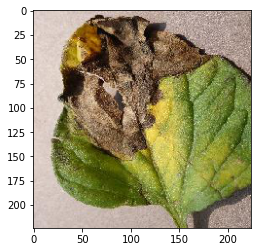

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  preds = modelvgg16.predict(x)
  preds=np.argmax(preds, axis=1)
  if preds==0:
        preds="Tomato___Bacterial_spot"
  elif preds==1:
        preds="Tomato___Early_blight"
  elif preds==2:
        preds="Tomato___healthy"
  elif preds==3:
        preds="Tomato___Late_blight"
  elif preds==4:
        preds="Tomato___Leaf_Mold"
  elif preds==5:
        preds="Tomato___Septoria_leaf_spot"
  elif preds==6:
        preds="Tomato___Spider_mites Two-spotted_spider_mite"
  elif preds==7:
        preds="Tomato___Target_Spot"
  elif preds==8:
        preds="Tomato___Tomato_mosaic_virus"
  else:
        preds="Tomato___Tomato_Yellow_Leaf_Curl_Virus"
  print(preds)
  plt.imshow(img)

VGG16 - Fine Tuning

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.0 MB/s eta 0:00:00


In [ ]:
#Import tensorflow and keras library
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing import image
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
import keras
from tensorflow.keras.callbacks import ModelCheckpoint

print("[INFO]: Tensorflow version{}".format(tf.__version__))
state_gpu = tf.test.gpu_device_name()
print("[INFO]: GPU usage{0}".format(state_gpu))

[INFO]: Tensorflow version2.11.0
[INFO]: GPU usage/device:GPU:0


In [ ]:
ROT_RANGE = 10

# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
rescale = 1./255,
rotation_range = ROT_RANGE,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

valid_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train' 
VALIDATION_DIR = '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
TARGET_SIZE = (224,224)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

Found 17104 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
base_model_weights_path = '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(weights=base_model_weights_path, include_top=False, input_shape=(224, 224, 3))

x = keras.layers.Flatten() (base_model.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.25)(x)
output = keras.layers.Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=output)

# The newly added layers are initialized with random values.
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
LEARNING_RATE = 0.0001

#Optimizer
opt = Adam(lr = LEARNING_RATE)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
TRAINING_NUM = train_data.n #or train_data.samples
VALID_NUM = valid_data.n
EPOCHS = 10

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

# Fit model to get reasonable weights for newly added layers.
history = model.fit_generator(generator = train_data,
                             steps_per_epoch = STEP_SIZE_TRAIN,
                             validation_data = valid_data,
                             validation_steps = STEP_SIZE_VALID,
                             epochs = EPOCHS)

<ipython-input-68-e0cacc9e69cc>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_data,


Epoch 1/10
133/133 [==============================] - 328s 2s/step - loss: 1.3372 - accuracy: 0.5601 - val_loss: 0.8374 - val_accuracy: 0.7437
Epoch 2/10
133/133 [==============================] - 327s 2s/step - loss: 0.8330 - accuracy: 0.7284 - val_loss: 0.6747 - val_accuracy: 0.7830
Epoch 3/10
133/133 [==============================] - 309s 2s/step - loss: 0.7066 - accuracy: 0.7727 - val_loss: 0.5568 - val_accuracy: 0.8260
Epoch 4/10
133/133 [==============================] - 308s 2s/step - loss: 0.6271 - accuracy: 0.7938 - val_loss: 0.5844 - val_accuracy: 0.8055
Epoch 5/10
133/133 [==============================] - 323s 2s/step - loss: 0.5705 - accuracy: 0.8157 - val_loss: 0.5066 - val_accuracy: 0.8405
Epoch 6/10
133/133 [==============================] - 330s 2s/step - loss: 0.5316 - accuracy: 0.8269 - val_loss: 0.4536 - val_accuracy: 0.8571
Epoch 7/10
133/133 [==============================] - 313s 2s/step - loss: 0.4991 - accuracy: 0.8367 - val_loss: 0.4565 - val_accuracy: 0.8521

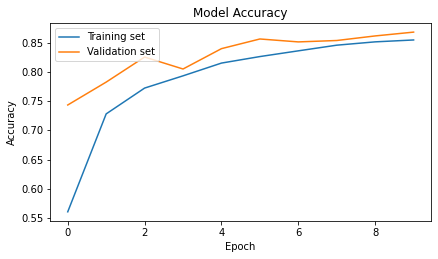

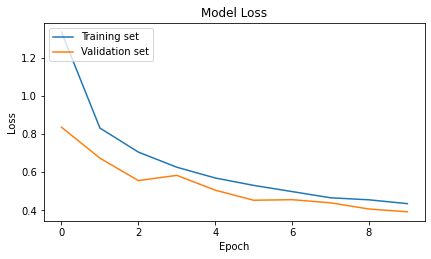

In [ ]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 86.8881106376648
